### spicy imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.append('/home/loringm/proliferation-and-track')
from working.schoolyard import Tracker, clean_match_dictionary
from working.cells import Cell, Cells, new_cell

### generic imports

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import zarr
import logging

from scipy import ndimage

In [4]:
logging.basicConfig(level=logging.INFO)

#### load data

In [5]:
zarr_dir = '/home/loringm/Downloads/SIMULATED_DATASET/01/data.n5'
data = zarr.open(zarr_dir)

#### grab a subset of data

In [6]:
imgs = data['GT'][:, 30, 144:400, 144:400]

#### convert perfect ground truth to binary, then assign val to each segmented region
#### similar to getting a nice semantic segmentation and then assigning vals 

In [7]:
bnr_images = [np.array(img > 0, dtype=np.int8) for img in imgs]
labeled_images = [ndimage.label(bnrimage)[0] for bnrimage in bnr_images]

## EVERYHING ONWARDS IS THE FORBIDDEN ZONE

In [8]:
'''
untested on z -- might work, mostly will be the cell position calculations, pray to the numpys

'''

'\nuntested on z -- might work, mostly will be the cell position calculations, pray to the numpys\n\n'

In [ ]:
### currently this workflow works for everything except the updating to be current stage!
### this is currently removing cells if they did not have a match in frame n-1 

### We want to remove cells only that were in frame n-1 AND not current
### if it was in n-1 and matched to current, then we update


In [9]:
n = 0


cells = Cells()
runningCells = {}

if n == 0:
    unique_neurons = np.unique(labeled_images[n])[1:]
    logging.info(f'creating {len(unique_neurons)} neurons on frame {n}')
    for neuron in unique_neurons:
        # get x,y position of cell
        cellpos = np.mean(np.where(labeled_images[n] == neuron), axis=1)
        # make a new cell
        newcell = new_cell(neuron, cellpos)
        # put cell in with his friends
        # the global friendslist
        cells.add_cell(newcell)
        # the current group of friends
        runningCells[neuron] = newcell.idx
        
        
logging.info(f'{len(runningCells)} neurons after round {n}')

n += 1
## AT SOME POINT ALL THIS WILL BE IN FOR'D LOOPYLOOPS

if n==1:
    ## DO WE HAVE ENOUGH CELLIES?
    unique_neurons = np.unique(labeled_images[n])[1:]
    if len(unique_neurons) > len(runningCells):
        current_numb = len(runningCells)
        new_numb = len(unique_neurons)
        diff = new_numb - current_numb
        logging.info(f'creating {diff} on frame {n}')

        for i in range(diff):
            loc_id = i + current_numb + 1
            
            cellpos = np.mean(np.where(labeled_images[n] == loc_id), axis=1)
            
            newcell = new_cell(loc_id, cellpos)
            
            cells.add_cell(newcell)
            runningCells[loc_id] = newcell.idx

    
    ## LETS PLAY MATCHMAKERRR
    tracker = Tracker(labeled_images[n-1], labeled_images[n])
    
    network, matches = tracker.create_network()
    previous_depth = tracker.layer1_depth
    
    cleaned_matches = clean_match_dictionary(matches, previous_depth)
    logging.info(f'created {len(cleaned_matches)//2} matches from {n} to {n-1}')
    
    new_running_matches = {}
    for neuron in runningCells.copy():
        if neuron not in cleaned_matches:
            # HECK WITH THIS CELL
            logging.info(f'removing neuron {neuron} from active on {n}')
            # del runningCells[neuron] 
        else:
            # UPDATE THE CELL TO BE CURRENT
            updatedcell = cells.get_cell(runningCells[neuron])
            updatedcell.cost = network.edges[(neuron, cleaned_matches[neuron])]['weight']
            updatedcell.curr_id = cleaned_matches[neuron] - previous_depth
            updatedcell.position = np.mean(np.where(labeled_images[n] == updatedcell.curr_id), axis=1)
            new_running_matches[neuron] = updatedcell.idx
    runningCells = new_running_matches
logging.info(f'{len(runningCells)} neurons after round {n}')    
n+=1
if n==2:
    ## DO WE HAVE ENOUGH CELLIES?
    unique_neurons = np.unique(labeled_images[n])[1:]
    if len(unique_neurons) > len(runningCells):
        current_numb = len(runningCells)
        new_numb = len(unique_neurons)
        diff = new_numb - current_numb
        logging.info(f'creating {diff} on frame {n}')

        for i in range(diff):
            loc_id = i + current_numb + 1
            
            cellpos = np.mean(np.where(labeled_images[n] == loc_id), axis=1)
            
            newcell = new_cell(loc_id, cellpos)
            
            cells.add_cell(newcell)
            runningCells[loc_id] = newcell.idx
            
    ## LETS PLAY MATCHMAKERRR
    tracker = Tracker(labeled_images[n-1], labeled_images[n])
    
    network, matches = tracker.create_network()
    previous_depth = tracker.layer1_depth
    
    cleaned_matches = clean_match_dictionary(matches, previous_depth)
    logging.info(f'created {len(cleaned_matches)//2} matches from {n} to {n-1}')
    
    new_running_matches = {}
    for neuron in runningCells.copy():
        if neuron not in cleaned_matches:
            # HECK WITH THIS CELL
            logging.info(f'removing neuron {neuron} from active on {n}')
            # del runningCells[neuron] 
        else:
            # UPDATE THE CELL TO BE CURRENT
            print('updating cell')
            updatedcell = cells.get_cell(runningCells[neuron])
            updatedcell.cost = network.edges[(neuron, cleaned_matches[neuron])]['weight']
            updatedcell.curr_id = cleaned_matches[neuron] - previous_depth
            updatedcell.position = np.mean(np.where(labeled_images[n] == updatedcell.curr_id), axis=1)
            print('meow')
            new_running_matches[neuron] = updatedcell.idx
            print(new_running_matches)
    runningCells = new_running_matches
logging.info(f'{len(runningCells)} neurons after round {n}')   
n+=1
if n==3:
    ## DO WE HAVE ENOUGH CELLIES?
    unique_neurons = np.unique(labeled_images[n])[1:]
    print(len(unique_neurons), len(runningCells))
    if len(unique_neurons) > len(runningCells):
        current_numb = len(runningCells)
        new_numb = len(unique_neurons)
        diff = new_numb - current_numb
        logging.info(f'creating {diff} neurons on frame {n}')

        for i in range(diff):
            loc_id = i + current_numb + 1
            
            cellpos = np.mean(np.where(labeled_images[n] == loc_id), axis=1)
            
            newcell = new_cell(loc_id, cellpos)
            
            cells.add_cell(newcell)
            runningCells[loc_id] = newcell.idx
            
    ## LETS PLAY MATCHMAKERRR
    tracker = Tracker(labeled_images[n-1], labeled_images[n])
    
    network, matches = tracker.create_network()
    previous_depth = tracker.layer1_depth
    
    cleaned_matches = clean_match_dictionary(matches, previous_depth)
    logging.info(f'created {len(cleaned_matches)//2} matches from {n} to {n-1}')
    
    new_running_matches = {}
    for neuron in runningCells.copy():
        if neuron not in cleaned_matches:
            # HECK WITH THIS CELL
            logging.info(f'removing neuron {neuron} from active on {n}')
            # del runningCells[neuron] 
        else:
            # UPDATE THE CELL TO BE CURRENT
            updatedcell = cells.get_cell(runningCells[neuron])
            updatedcell.cost = network.edges[(neuron, cleaned_matches[neuron])]['weight']
            updatedcell.curr_id = cleaned_matches[neuron] - previous_depth
            updatedcell.position = np.mean(np.where(labeled_images[n] == updatedcell.curr_id), axis=1)
            new_running_matches[neuron] = updatedcell.idx
    runningCells = new_running_matches

INFO:root:creating 0 neurons on frame 0
INFO:root:0 neurons after round 0
INFO:root:creating 2 on frame 1
INFO:root:created 0 matches from 1 to 0
INFO:root:removing neuron 1 from active on 1
INFO:root:removing neuron 2 from active on 1
INFO:root:0 neurons after round 1
INFO:root:creating 1 on frame 2
INFO:root:created 1 matches from 2 to 1
INFO:root:removing neuron 1 from active on 2
INFO:root:0 neurons after round 2
INFO:root:creating 1 neurons on frame 3
INFO:root:created 1 matches from 3 to 2


1 0


In [ ]:
'''

Workflow Model:::


tracker = Tracker()
all_cells = Cells()

full_network = Network() ## TOTALLY UNIMPLEMENTED

for frame in all_frames:
    
    neurons, network, matches = tracker.process(frame[n], frame[n-1])
    
    all_cells.update(neurons, matches)
    full_network.update(network)
        
'''

In [ ]:
v    tracker = Tracker(labeled_images[n-1], labeled_images[n])
    
    network, matches = tracker.create_network()
    previous_depth = tracker.layer1_depth
    
    cleaned_matches = clean_match_dictionary(matches, previous_depth)

In [10]:
new_running_matches

{1: UUID('5a9a007d-4417-4d91-a085-bdeb973c6e4c')}

In [11]:
np.unique(labeled_images[n])[1:]

array([1], dtype=int32)

In [12]:
len(unique_neurons) > len(runningCells)

False

In [13]:
new_numb

1

In [14]:
updatedcell.positions

[array([ 84.66666667, 219.54578755]), array([ 84.66666667, 219.54578755])]

In [15]:
runningCells

{1: UUID('5a9a007d-4417-4d91-a085-bdeb973c6e4c')}

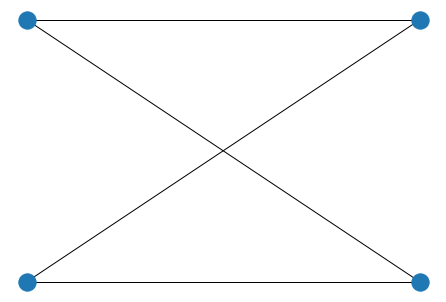

In [16]:
pos = nx.multipartite_layout(network, subset_key="layer")
nx.draw(network, pos)